In [1]:
!pip install fireflyalgorithm

     --------------------------------------- 15.8/15.8 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\condaenv\\envs\\torchenv\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [1]:
%matplotlib inline

In [2]:
from flask import Flask, request, render_template
import cv2
import numpy as np
from sklearn.cluster import KMeans
from fireflyalgorithm import FireflyAlgorithm
import matplotlib.pyplot as plt

def load_image(image_path, color=True):
    if color:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def flatten_image(image):
    if len(image.shape) == 3:
        pixels = image.reshape(-1, 3)
    else:
        pixels = image.reshape(-1, 1)
    return pixels

def objective_function(centroids, pixels):
    labels = KMeans(n_clusters=len(centroids), init=centroids,
                    n_init=1).fit_predict(pixels)
    mse = np.mean((pixels - centroids[labels]) ** 2)
    return mse

def perform_firefly_algorithm_optimization(pixels, num_centroids, num_fireflies):
    lower_bound = np.zeros(pixels.shape[1] * num_centroids)
    upper_bound = np.ones(pixels.shape[1] * num_centroids) * 255
    
    def objective(centroids):
        return objective_function(centroids.reshape(-1, pixels.shape[1]), pixels)
    
    firefly_algorithm = FireflyAlgorithm()
    best_solution = firefly_algorithm.run(objective, dim=num_centroids * pixels.shape[1],
                                          lb=lower_bound, ub=upper_bound, max_evals=200)
    
    if best_solution.size == 1:
        # If the optimization did not converge, provide a default solution
        centroids = np.random.uniform(0, 255, size=(num_centroids, pixels.shape[1]))
    else:
        centroids = best_solution.reshape(-1, pixels.shape[1])
    
    return centroids


def perform_image_segmentation(image_path, num_centroids, num_fireflies, color=True):
    image = load_image(image_path, color)
    pixels = flatten_image(image)
    centroids = perform_firefly_algorithm_optimization(pixels, num_centroids, num_fireflies)
    labels = KMeans(n_clusters=len(centroids), init=centroids,
                    n_init=1).fit_predict(pixels)
    
    if len(image.shape) == 3:
        segmented_image = centroids[labels].reshape(image.shape)
        segmented_image = cv2.cvtColor(
            segmented_image.astype(np.uint8), cv2.COLOR_RGB2BGR)
    else:
        segmented_image = centroids[labels].reshape(image.shape)
        segmented_image = segmented_image.astype(np.uint8)

    # Display the original and segmented images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title('Segmented Image')

    plt.show()



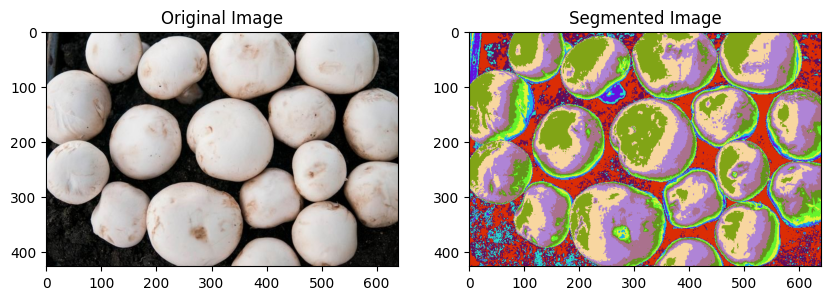

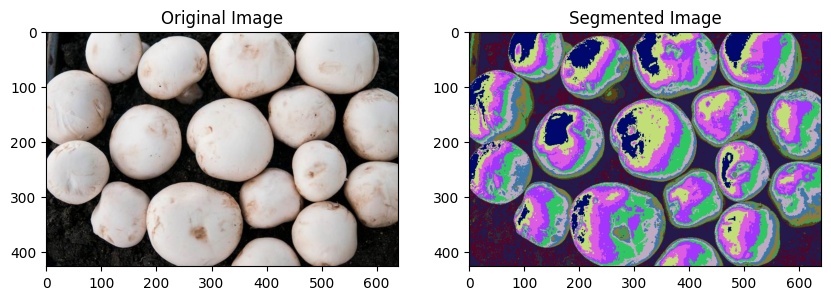

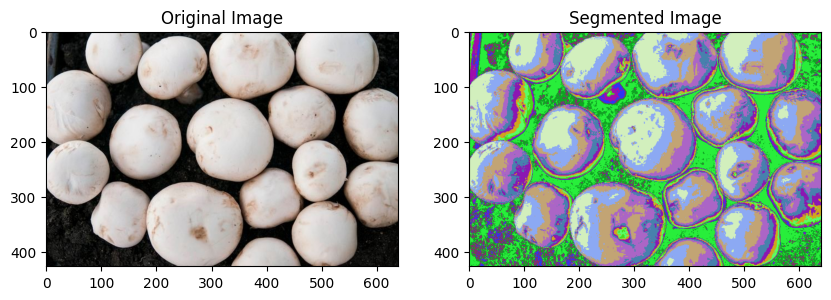

Execution time with 12 centroids and 144 fireflies: 103.81 seconds
Execution time with 13 centroids and 169 fireflies: 99.09 seconds
Execution time with 14 centroids and 256 fireflies: 139.60 seconds


In [3]:
import time

times = []
parameters = [
    {'num_centroids': 12, 'num_fireflies': 144},
    {'num_centroids': 13, 'num_fireflies': 169},
    {'num_centroids': 14, 'num_fireflies': 256}
]

for params in parameters:
    start_time = time.time()
    perform_image_segmentation(image_path='static\mushrooms0.jpg', **params, color=True)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)

# Print the recorded times
for i, t in enumerate(times):
    print(f"Execution time with {parameters[i]['num_centroids']} centroids and {parameters[i]['num_fireflies']} fireflies: {t:.2f} seconds")

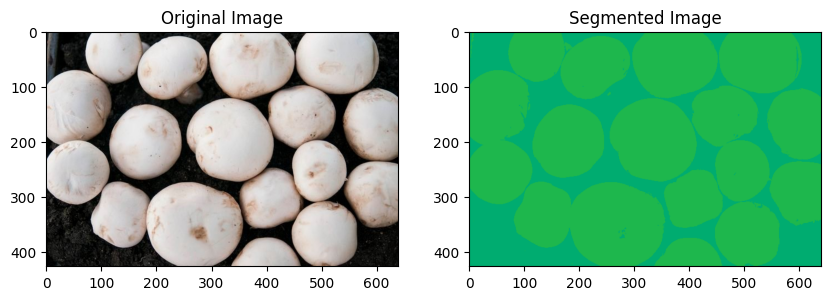

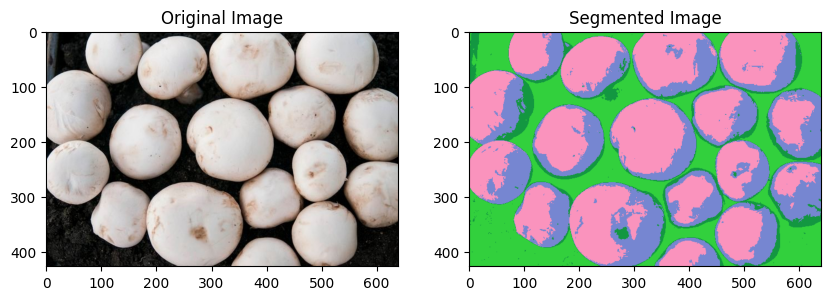

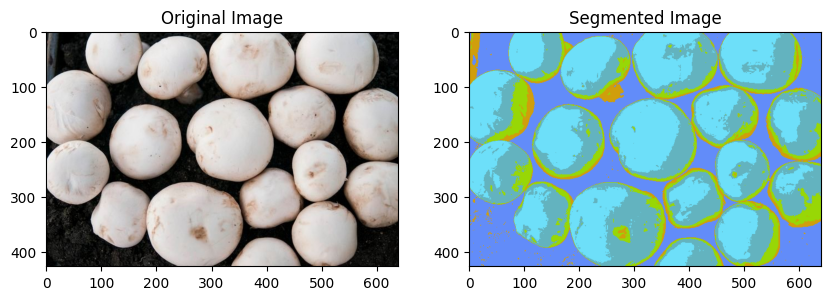

In [4]:

perform_image_segmentation(image_path='static\mushrooms0.jpg', num_centroids=2, num_fireflies=4, color=True)
perform_image_segmentation(image_path='static\mushrooms0.jpg', num_centroids=4, num_fireflies=16, color=True)
perform_image_segmentation(image_path='static\mushrooms0.jpg', num_centroids=5, num_fireflies=25, color=True)